In [0]:
#Project: Analyzing Stock exchange data for different companies to build a predictive model for closing price.

In [0]:
# Group 4 members:
# Jessica Bolz
# Luis Galvan
# Nidhishree Sanam 

In [0]:
!pip install --upgrade pip

In [0]:
!pip install -q yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [0]:
%pip install xgboost

Python interpreter will be restarted.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Not uninstalling numpy at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-c7bd9eb5-04fc-42bf-9cce-8df551af4f73
    Can't uninstall 'numpy'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
!pip install prophet

In [0]:
!pip show pandas

Name: pandas
Version: 1.5.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /databricks/python3/lib/python3.8/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: prophet, cmdstanpy, yfinance, statsmodels, seaborn, koalas, facets-overview


In [0]:
!pip install --upgrade pandas

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c7bd9eb5-04fc-42bf-9cce-8df551af4f73/bin/python -m pip install --upgrade pip' command.


In [0]:
pip install pandas_datareader

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [0]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','TSLA','NVDA','META','CRM','INTC','PYPL','BABA','AMD']

# Setting up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA','NVDA','META','CRM','INTC','PYPL','BABA','AMD']

end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)   #Using globals() is a sloppy way of setting the DataFrame names, but its simple

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [0]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NVDA, META, CRM, INTC, PYPL, BABA, AMD]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TESLA","NVIDIA","META", "SALESFORCE","INTEL","PAYPAL","ALIBABA","ADVANCED MICRO DEVICES"]
    
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()   
    
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
stock_df = pd.concat(company_list, axis=0)
stock_df= stock_df.reset_index()
stock_df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,company_name
49203,2022-11-29,73.620003,74.489998,72.779999,73.389999,73.389999,51846400,0.002733,ADVANCED MICRO DEVICES
49204,2022-11-30,73.379997,77.699997,72.809998,77.629997,77.629997,88391400,0.057774,ADVANCED MICRO DEVICES
49205,2022-12-01,78.309998,79.230003,76.440002,77.480003,77.480003,59833400,-0.001932,ADVANCED MICRO DEVICES
49206,2022-12-02,75.050003,76.279999,73.650002,74.980003,74.980003,64325200,-0.032266,ADVANCED MICRO DEVICES
49207,2022-12-05,74.540001,75.169998,72.820000,73.620003,73.620003,47022200,-0.018138,ADVANCED MICRO DEVICES
49208,2022-12-06,73.080002,73.389999,69.400002,70.269997,70.269997,64965200,-0.045504,ADVANCED MICRO DEVICES
49209,2022-12-07,69.529999,71.370003,69.279999,70.139999,70.139999,59180100,-0.001850,ADVANCED MICRO DEVICES
49210,2022-12-08,70.139999,71.220001,69.000000,70.470001,70.470001,56734100,0.004705,ADVANCED MICRO DEVICES
49211,2022-12-09,69.489998,70.669998,68.519997,68.589996,68.589996,58999400,-0.026678,ADVANCED MICRO DEVICES
49212,2022-12-12,68.540001,70.669998,67.529999,70.669998,70.669998,60968341,0.030325,ADVANCED MICRO DEVICES


In [0]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df= closing_df.reset_index()
# Let's take a quick look
closing_df.head()

Symbols,Date,AAPL,GOOG,MSFT,AMZN,TSLA,NVDA,META,CRM,INTC,PYPL,BABA,AMD
0,2002-12-13,0.225130,NaN,16.418350,1.1090,NaN,1.012587,NaN,NaN,10.433740,NaN,NaN,7.32
1,2002-12-16,0.226043,NaN,17.037556,1.1255,NaN,1.072240,NaN,NaN,10.813575,NaN,NaN,7.47
2,2002-12-17,0.229544,NaN,17.000032,1.1230,NaN,1.070712,NaN,NaN,10.617717,NaN,NaN,7.34
3,2002-12-18,0.221781,NaN,16.740454,1.1050,NaN,0.988878,NaN,NaN,10.166658,NaN,NaN,6.67
4,2002-12-19,0.216148,NaN,16.609121,1.0845,NaN,0.967464,NaN,NaN,10.089504,NaN,NaN,6.47


In [0]:
from pyspark.sql.types import *             
from pyspark.sql.functions import *
from pyspark.pandas.plot import *

Tried to attach usage logger `pyspark.databricks.pandas.usage_logger`, but an exception was raised: <property object at 0x7f4f800d9270> is not a callable object


In [0]:
Stock_DF=spark.createDataFrame(stock_df) #converting to spark dataframe
Closing_DF= spark.createDataFrame(closing_df)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:539: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  arrow_data = [[(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [0]:
Stock_DF.printSchema()  #checking the schema for the dataframe
Closing_DF.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Daily Return: double (nullable = true)
 |-- company_name: string (nullable = true)

root
 |-- Date: timestamp (nullable = true)
 |-- AAPL: double (nullable = true)
 |-- GOOG: double (nullable = true)
 |-- MSFT: double (nullable = true)
 |-- AMZN: double (nullable = true)
 |-- TSLA: double (nullable = true)
 |-- NVDA: double (nullable = true)
 |-- META: double (nullable = true)
 |-- CRM: double (nullable = true)
 |-- INTC: double (nullable = true)
 |-- PYPL: double (nullable = true)
 |-- BABA: double (nullable = true)
 |-- AMD: double (nullable = true)



In [0]:
Stock_DF.show(5)


+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+--------------------+------------+
|               Date|               Open|               High|                Low|              Close|          Adj Close|   Volume|        Daily Return|company_name|
+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+--------------------+------------+
|2002-12-13 00:00:00|0.27035701274871826|0.27053600549697876|0.26160699129104614|0.26410698890686035|0.22512952983379364|164780000|                null|       APPLE|
|2002-12-16 00:00:00|0.26446399092674255|0.26964300870895386|0.26089298725128174|0.26517900824546814|0.22604335844516754|251624800|0.004059123705577594|       APPLE|
|2002-12-17 00:00:00|0.26517900824546814|0.27125000953674316|0.26178601384162903|0.26928600668907166| 0.2295442521572113|222661600|0.015487708801198874|       APPLE|
|200

In [0]:
Closing_DF.show(5)

+-------------------+-------------------+----+------------------+------------------+----+------------------+----+----+------------------+----+----+-----------------+
|               Date|               AAPL|GOOG|              MSFT|              AMZN|TSLA|              NVDA|META| CRM|              INTC|PYPL|BABA|              AMD|
+-------------------+-------------------+----+------------------+------------------+----+------------------+----+----+------------------+----+----+-----------------+
|2002-12-13 00:00:00| 0.2251296043395996|null|16.418350219726562|1.1089999675750732|null|1.0125865936279297|null|null| 10.43373966217041|null|null|7.320000171661377|
|2002-12-16 00:00:00|0.22604332864284515|null|17.037555694580078| 1.125499963760376|null|1.0722404718399048|null|null| 10.81357479095459|null|null| 7.46999979019165|
|2002-12-17 00:00:00|0.22954420745372772|null|17.000032424926758|1.1230000257492065|null| 1.070711612701416|null|null|10.617716789245605|null|null|7.340000152587891|
|200

In [0]:
#Number of rows & columns in the dataset 

print("Number of rows: " ,Stock_DF.count())
print("Number of columns: ", len(Stock_DF.columns))

Number of rows:  49213
Number of columns:  9


In [0]:
#statistics summary of the dataset using describe 

numeric_features = [t[0] for t in Stock_DF.dtypes if (t[1] == 'long' or t[1]=='double')]
Stock_DF.select(numeric_features).describe().toPandas().transpose()  


,0,1,2,3,4
summary,count,mean,stddev,min,max
Open,49213,56.694480799086016,69.8867649879936,0.23196400701999664,411.4700012207031
High,49213,57.44700793537708,70.8544073913619,0.23553599417209625,414.4966735839844
Low,49213,55.89108395994931,68.81802491680803,0.22714300453662872,405.6666564941406
Close,49213,56.685317942138944,69.85479305098707,0.23428599536418915,409.9700012207031
Adj Close,49213,55.267903826800904,70.21905078058262,0.19970957934856415,409.9700012207031
Daily Return,49201,0.0010645359445990888,0.026235814604404505,-0.35233481036420256,0.5229008335186689


In [0]:
# looping through the columns to find the total count of Nulls in each column

numeric_features = [t[0] for t in Stock_DF.dtypes if (t[1] == 'long' or t[1]=='double')]
categorical_features = [t[0] for t in Stock_DF.dtypes if (t[1] == 'string')]

for i in numeric_features:
    count = Stock_DF.filter(Stock_DF[i].isNull()).count()
    print('Total null counts for',i,'are:',count)
for i in categorical_features:
    count = Stock_DF.filter(Stock_DF[i] == 'NA').count()
    print('Total null counts for',i,'are:',count)

Total null counts for Open are: 0
Total null counts for High are: 0
Total null counts for Low are: 0
Total null counts for Close are: 0
Total null counts for Adj Close are: 0
Total null counts for Daily Return are: 12
Total null counts for company_name are: 0


In [0]:
#Correlations between independent variables.
import seaborn as sns
numeric_data = Stock_DF.select(numeric_features).toPandas()

plt.figure(figsize=(20, 20))
axs = sns.pairplot(numeric_data)


In [0]:
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TESLA","NVIDIA","META", "SALESFORCE","INTEL","PAYPAL","ALIBABA","ADVANCED MICRO DEVICES"]

for name in company_name:
  print("\nSummary statistics for ", name)
  summary= Stock_DF.filter(Stock_DF.company_name == name).describe()
  summary.show()



In [0]:
display(Stock_DF.groupby('company_name').count())

company_name,count
APPLE,5034
GOOGLE,4612
MICROSOFT,5034
AMAZON,5034
NVIDIA,5034
TESLA,3137
META,2660
SALESFORCE,4652
INTEL,5034
ALIBABA,2073


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
display(Stock_DF.groupby('company_name',year('Date').alias('Year')).agg(avg('Daily Return').alias('Avg_Daily Return')).orderBy(year('Date'),ascending=False))


company_name,Year,Avg_Daily Return
META,2022,-0.003622316265416925
NVIDIA,2022,-0.0013698532035813116
APPLE,2022,-5.89137140980277E-4
SALESFORCE,2022,-0.0022565488986914196
GOOGLE,2022,-0.0015274579453140433
AMAZON,2022,-0.0020518421253735634
PAYPAL,2022,-0.00320537294557537
INTEL,2022,-0.0019947703726621523
TESLA,2022,-0.0022613826945795403
ALIBABA,2022,-1.1680244652146208E-4


Output can only be rendered in Databricks

In [0]:
display(Stock_DF.groupby('company_name',year('Date').alias('Year')).agg(avg('Adj Close').alias('Avg_closing_price')).orderBy(year('Date'),ascending=False))


company_name,Year,Avg_closing_price
META,2022,183.57226943969727
NVIDIA,2022,187.056637643766
APPLE,2022,155.50567909048385
SALESFORCE,2022,179.17466357575745
GOOGLE,2022,116.55980461184718
AMAZON,2022,128.28346018430565
PAYPAL,2022,98.48609289602071
INTEL,2022,38.31753658647297
TESLA,2022,270.0427030675551
ALIBABA,2022,97.2418066553709


Output can only be rendered in Databricks

In [0]:

display(Stock_DF.groupby('company_name',year('Date').alias('Year')).agg(avg('Volume').alias('Avg_Volume')).orderBy(year('Date'),ascending=False))


company_name,Year,Avg_Volume
META,2022,3.5876641445378155E7
NVIDIA,2022,5.4934620084033616E7
APPLE,2022,8.797573005882353E7
SALESFORCE,2022,7594024.180672269
GOOGLE,2022,2.8855368096638657E7
AMAZON,2022,7.60676546764706E7
PAYPAL,2022,1.716952005882353E7
INTEL,2022,3.9050150294117644E7
TESLA,2022,8.240337760924369E7
ALIBABA,2022,2.726235111764706E7


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:

display(Stock_DF.groupby('company_name',year('Date').alias('Year')).agg(avg('Low').alias('Avg_Low')).orderBy(year('Date'),ascending=False))


company_name,Year,Avg_Low
META,2022,180.2026052394835
NVIDIA,2022,182.32180705992113
APPLE,2022,153.80974777606355
SALESFORCE,2022,176.00193289748762
GOOGLE,2022,115.00683869434005
AMAZON,2022,126.04588692929565
PAYPAL,2022,96.48355442335625
INTEL,2022,38.681885727313386
TESLA,2022,263.23910368590793
ALIBABA,2022,95.06536535054695


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
display(Stock_DF.groupby('company_name',year('Date').alias('Year')).agg(avg('High').alias('Avg_High')).orderBy(year('Date'),ascending=False))

company_name,Year,Avg_High
META,2022,187.33092469928644
NVIDIA,2022,191.92869740975004
APPLE,2022,158.0364286278476
SALESFORCE,2022,182.5529786438501
GOOGLE,2022,118.29813619020607
AMAZON,2022,130.64698971019072
PAYPAL,2022,100.74186950170693
INTEL,2022,39.794705919858785
TESLA,2022,277.5616665367319
ALIBABA,2022,99.53871408029765


Output can only be rendered in Databricks

In [0]:
#historical view of closing price

plt.figure(figsize=(25, 25))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Period')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [0]:
#total volume of stock being traded each day

plt.figure(figsize=(30, 40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(12, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Period')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [0]:
# the average daily return using a histogram

plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [0]:
ma_day = [7, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 7 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 7 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 7 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 7 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [0]:
apple_df = DataReader('AAPL', data_source='yahoo', start='1980-01-01', end=datetime.now())
apple_df= apple_df.reset_index()
Apple_DF=spark.createDataFrame(apple_df) 
Apple_DF.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:539: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  arrow_data = [[(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [0]:
Apple_DF.show(5)

+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+
|               Date|               High|                Low|               Open|              Close|    Volume|          Adj Close|
+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+
|1980-12-12 00:00:00| 0.1289059966802597| 0.1283479928970337| 0.1283479928970337| 0.1283479928970337|4.690336E8|0.09987381845712662|
|1980-12-15 00:00:00|0.12221000343561172|0.12165199965238571|0.12221000343561172|0.12165199965238571|1.758848E8| 0.0946633443236351|
|1980-12-16 00:00:00| 0.1132809966802597|0.11272300034761429| 0.1132809966802597|0.11272300034761429| 1.05728E8|0.08771521598100662|
|1980-12-17 00:00:00|0.11607100069522858|0.11551299691200256|0.11551299691200256|0.11551299691200256| 8.64416E7|0.08988628536462784|
|1980-12-18 00:00:00|0.11941999942064285|0.11886200308799744|0.118862

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

#Assemble input columns in to a single vector
vector_assembler = VectorAssembler(\

inputCols=['High','Low','Open','Volume'], outputCol=  'features')

#transforming to vector feature
Apple_DF_transformed = vector_assembler.transform(Apple_DF)
Apple_DF_transformed.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- features: vector (nullable = true)



In [0]:
Apple_DF_transformed.show(5)

+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+--------------------+
|               Date|               High|                Low|               Open|              Close|    Volume|          Adj Close|            features|
+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+--------------------+
|1980-12-12 00:00:00| 0.1289059966802597| 0.1283479928970337| 0.1283479928970337| 0.1283479928970337|4.690336E8|0.09987381845712662|[0.12890599668025...|
|1980-12-15 00:00:00|0.12221000343561172|0.12165199965238571|0.12221000343561172|0.12165199965238571|1.758848E8| 0.0946633443236351|[0.12221000343561...|
|1980-12-16 00:00:00| 0.1132809966802597|0.11272300034761429| 0.1132809966802597|0.11272300034761429| 1.05728E8|0.08771521598100662|[0.11328099668025...|
|1980-12-17 00:00:00|0.11607100069522858|0.11551299691200256|0.1155129969120

In [0]:

(trainingData, testData) = Apple_DF_transformed.randomSplit([0.75, 0.25],seed = 12345)

In [0]:
# Building a Linear Regression model

from pyspark.ml.regression import LinearRegression

lin_reg = LinearRegression(featuresCol = 'features', labelCol='Close')
linear_model = lin_reg.fit(trainingData)
print("Coefficients: " + str(linear_model.coefficients))
print("\nIntercept: " + str(linear_model.intercept))

#evaluating RMSE, R2 for the train dataset
trainSummary = linear_model.summary
print("RMSE: %f" % trainSummary.rootMeanSquaredError)
print("\nr2: %f" % trainSummary.r2)

Coefficients: [0.9024604671697684,0.7989122751568797,-0.7020425729737159,1.3168376044796076e-12]

Intercept: -0.00020864484733521758
RMSE: 0.265264

r2: 0.999942


In [0]:
#evaluating RMSE,R2, MAE, MSE for the test dataset

from  pyspark.sql.functions import abs
predictions = linear_model.transform(testData)
x =((predictions['Close']-predictions['prediction'])/predictions['Close'])*100
predictions = predictions.withColumn('Accuracy',abs(x))
predictions.select("prediction","Close","features").show(truncate=False)


from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data",evaluator.evaluate(predictions,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(predictions,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(predictions,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(predictions,
{evaluator.metricName: "mae"})
)

+-------------------+-------------------+------------------------------------------------------------------------+
|prediction         |Close              |features                                                                |
+-------------------+-------------------+------------------------------------------------------------------------+
|0.1325104504638944 |0.1322540044784546 |[0.1328130066394806,0.1322540044784546,0.1322540044784546,3.73632E7]    |
|0.14701436879967647|0.14676299691200256|[0.14732100069522858,0.14676299691200256,0.14676299691200256,4.15744E7] |
|0.1421464840045241 |0.14229899644851685|[0.14285700023174286,0.14229899644851685,0.14285700023174286,3.00832E7] |
|0.14381219134846793|0.1439729928970337 |[0.1445309966802597,0.1439729928970337,0.1445309966802597,2.464E7]      |
|0.12803601888369065|0.12779000401496887|[0.1283479928970337,0.12779000401496887,0.12779000401496887,2.78656E7]  |
|0.10812176669666392|0.10825899988412857|[0.10881700366735458,0.1082589998841285

In [0]:
# Building a DecisionTree Regression model

from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='Close')
model = dt.fit(trainingData)
test_dt = model.transform(testData)
test_dt.select("prediction","Close","features").show(truncate=False)

#evaluating RMSE,R2, MAE, MSE for the test dataset

evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data",evaluator.evaluate(test_dt,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(test_dt,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(test_dt,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(test_dt,
{evaluator.metricName: "mae"})
)

+-------------------+-------------------+------------------------------------------------------------------------+
|prediction         |Close              |features                                                                |
+-------------------+-------------------+------------------------------------------------------------------------+
|0.28116485002656055|0.1322540044784546 |[0.1328130066394806,0.1322540044784546,0.1322540044784546,3.73632E7]    |
|0.28116485002656055|0.14676299691200256|[0.14732100069522858,0.14676299691200256,0.14676299691200256,4.15744E7] |
|0.28116485002656055|0.14229899644851685|[0.14285700023174286,0.14229899644851685,0.14285700023174286,3.00832E7] |
|0.28116485002656055|0.1439729928970337 |[0.1445309966802597,0.1439729928970337,0.1445309966802597,2.464E7]      |
|0.28116485002656055|0.12779000401496887|[0.1283479928970337,0.12779000401496887,0.12779000401496887,2.78656E7]  |
|0.28116485002656055|0.10825899988412857|[0.10881700366735458,0.1082589998841285

In [0]:
# Building a RandomForest Regression model

from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol = 'features', labelCol='Close')
model = rf.fit(trainingData)
test_rf = model.transform(testData)
test_rf.select("prediction","Close","features").show(truncate=False)

#evaluating RMSE,R2, MAE, MSE for the test dataset

evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data",evaluator.evaluate(test_rf,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(test_rf,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(test_rf,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(test_rf,
{evaluator.metricName: "mae"})
)

+------------------+-------------------+------------------------------------------------------------------------+
|prediction        |Close              |features                                                                |
+------------------+-------------------+------------------------------------------------------------------------+
|0.2824919093978809|0.1322540044784546 |[0.1328130066394806,0.1322540044784546,0.1322540044784546,3.73632E7]    |
|0.2824919093978809|0.14676299691200256|[0.14732100069522858,0.14676299691200256,0.14676299691200256,4.15744E7] |
|0.2824919093978809|0.14229899644851685|[0.14285700023174286,0.14229899644851685,0.14285700023174286,3.00832E7] |
|0.2824919093978809|0.1439729928970337 |[0.1445309966802597,0.1439729928970337,0.1445309966802597,2.464E7]      |
|0.2824919093978809|0.12779000401496887|[0.1283479928970337,0.12779000401496887,0.12779000401496887,2.78656E7]  |
|0.2824919093978809|0.10825899988412857|[0.10881700366735458,0.10825899988412857,0.10881

In [0]:
# Building a xgboost Regression model

from xgboost.spark import SparkXGBRegressor

xgb_regressor = SparkXGBRegressor(features_col="features",label_col="Close", num_workers=2)

model = xgb_regressor.fit(trainingData)
test_xgb = model.transform(testData)
test_xgb.select("prediction","Close","features").show(truncate=False)

#evaluating RMSE,R2, MAE, MSE for the test dataset

evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data",evaluator.evaluate(test_xgb,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(test_xgb,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(test_xgb,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(test_xgb,
{evaluator.metricName: "mae"})
)


/local_disk0/.ephemeral_nfs/envs/pythonEnv-c7bd9eb5-04fc-42bf-9cce-8df551af4f73/lib/python3.8/site-packages/xgboost/sklearn.py:808: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn("Loading a native XGBoost model with Scikit-Learn interface.")
+-------------------+-------------------+------------------------------------------------------------------------+
|prediction         |Close              |features                                                                |
+-------------------+-------------------+------------------------------------------------------------------------+
|0.12302809953689575|0.1322540044784546 |[0.1328130066394806,0.1322540044784546,0.1322540044784546,3.73632E7]    |
|0.14254310727119446|0.14676299691200256|[0.14732100069522858,0.14676299691200256,0.14676299691200256,4.15744E7] |
|0.14254310727119446|0.14229899644851685|[0.14285700023174286,0.14229899644851685,0.14285700023174286,3.00832E7] |
|0.14254310727119446|0.143

Out[35]: <AxesSubplot:>

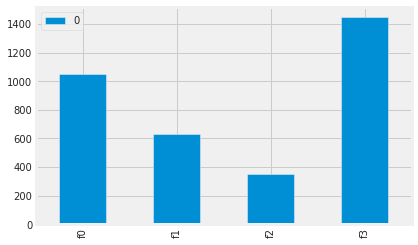

In [0]:
f_importance = model.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

importance_df.plot.bar()

In [0]:
#XGBoost regressor with hyperparameters and cross validation

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
 
# Define a grid of hyperparameters to test:
#  - maxDepth: maximum depth of each decision tree 

paramGrid = ParamGridBuilder()\
  .addGrid(xgb_regressor.max_depth, [2, 5])\
  .addGrid(xgb_regressor.n_estimators, [10, 50, 100])\
  .build()
 
# Define an evaluation metric.  The CrossValidator compares the true labels with predicted values for each combination of parameters, and calculates this value to determine the best model.
evaluator = RegressionEvaluator(metricName="rmse",
                                labelCol=xgb_regressor.getLabelCol(),
                                predictionCol=xgb_regressor.getPredictionCol())
 
# Declare the CrossValidator, which performs the model tuning.
xgb_cv = CrossValidator(estimator=xgb_regressor, evaluator=evaluator, estimatorParamMaps=paramGrid, numFolds=5)

model_xgbcv= xgb_cv.fit(trainingData)
test_cv_xgb = model_xgbcv.transform(testData)
test_cv_xgb.show(truncate=False)

#evaluating RMSE,R2, MAE, MSE for the test dataset

evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data", evaluator.evaluate(test_cv_xgb,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(test_cv_xgb,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(test_cv_xgb,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(test_cv_xgb,
{evaluator.metricName: "mae"})
)



/local_disk0/.ephemeral_nfs/envs/pythonEnv-c7bd9eb5-04fc-42bf-9cce-8df551af4f73/lib/python3.8/site-packages/xgboost/sklearn.py:808: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn("Loading a native XGBoost model with Scikit-Learn interface.")
+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+------------------------------------------------------------------------+-------------------+
|Date               |High               |Low                |Open               |Close              |Volume    |Adj Close          |features                                                                |prediction         |
+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+------------------------------------------------------------------------+-------------------+
|1980-12-22 00:00:00|0.132813006639480

In [0]:
#Multiple Linear regression with hyperparameters and cross validation

lrparamGrid = (ParamGridBuilder()
             .addGrid(lin_reg.regParam, [ 0.001, 0.01, 0.1, 0.5])
             .addGrid(lin_reg.elasticNetParam, [ 0.5, 1.0])
             .addGrid(lin_reg.maxIter, [1, 5, 10])
             .build())
 
# Define an evaluation metric.  The CrossValidator compares the true labels with predicted values for each combination of parameters, and calculates this value to determine the best model.

evaluator = RegressionEvaluator(metricName="rmse",
                                labelCol=lin_reg.getLabelCol(),
                                predictionCol=lin_reg.getPredictionCol())
 
# Declare the CrossValidator, which performs the model tuning.
lin_cv = CrossValidator(estimator=lin_reg, evaluator=evaluator, estimatorParamMaps=lrparamGrid, numFolds=5)

model_lrcv= lin_cv.fit(trainingData)
test_cv_lin = model_lrcv.transform(testData)
test_cv_lin.show(truncate=False)

#evaluating RMSE,R2, MAE, MSE for the test dataset

evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data", evaluator.evaluate(test_cv_lin,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(test_cv_lin,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(test_cv_lin,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(test_cv_lin,
{evaluator.metricName: "mae"})
)

+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+------------------------------------------------------------------------+-------------------+
|Date               |High               |Low                |Open               |Close              |Volume    |Adj Close          |features                                                                |prediction         |
+-------------------+-------------------+-------------------+-------------------+-------------------+----------+-------------------+------------------------------------------------------------------------+-------------------+
|1980-12-22 00:00:00|0.1328130066394806 |0.1322540044784546 |0.1322540044784546 |0.1322540044784546 |3.73632E7 |0.1029132753610611 |[0.1328130066394806,0.1322540044784546,0.1322540044784546,3.73632E7]    |0.13190558332333155|
|1981-01-19 00:00:00|0.14732100069522858|0.14676299691200256|0.14676299691200256|0.1467629969120

In [0]:
google_df = DataReader('GOOG', data_source='yahoo', start='1980-01-01', end=datetime.now())
google_df= google_df.reset_index()
Google_DF=spark.createDataFrame(google_df) 
Google_DF.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:539: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  arrow_data = [[(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

#Assemble input columns in to a single vector
vector_assembler = VectorAssembler(\

inputCols=['High','Low','Open','Volume'], outputCol=  'features')

#transforming to vector feature
Google_DF_transformed = vector_assembler.transform(Google_DF)
Google_DF_transformed.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- features: vector (nullable = true)



In [0]:
(trainingData1, testData1) = Google_DF_transformed.randomSplit([0.75, 0.25],seed = 12345)

In [0]:
# Building a Linear Regression model

from pyspark.ml.regression import LinearRegression

linreg = LinearRegression(featuresCol = 'features', labelCol='Close')
linearmodel = linreg.fit(trainingData1)
print("Coefficients: " + str(linearmodel.coefficients))
print("\nIntercept: " + str(linearmodel.intercept))

#evaluating RMSE, R2 for the train dataset
trainSummary_LR = linearmodel.summary
print("RMSE: %f" % trainSummary_LR.rootMeanSquaredError)
print("\nr2: %f" % trainSummary_LR.r2)

Coefficients: [0.7578937349991214,0.8571623254813313,-0.6142378556471417,2.088912929231733e-11]

Intercept: 0.005427524127651912
RMSE: 0.322653

r2: 0.999916


In [0]:
#evaluating RMSE,R2, MAE, MSE for the test dataset

from  pyspark.sql.functions import abs
predictions_LR = linearmodel.transform(testData1)
x1 =((predictions_LR['Close']-predictions_LR['prediction'])/predictions_LR['Close'])*100
predictions_LR = predictions_LR.withColumn('Accuracy',abs(x1))
predictions_LR.select("prediction","Close","features").show(truncate=False)


from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data",evaluator.evaluate(predictions_LR,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(predictions_LR,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(predictions_LR,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(predictions_LR,
{evaluator.metricName: "mae"})
)

+------------------+------------------+-----------------------------------------------------------------------+
|prediction        |Close             |features                                                               |
+------------------+------------------+-----------------------------------------------------------------------+
|2.6610110375216007|2.6438400745391846|[2.705359935760498,2.632383108139038,2.6924080848693848,1.24826132E8]  |
|3.004024449105911 |3.009221076965332 |[3.0543019771575928,2.9145750999450684,2.9599061012268066,1.71524515E8]|
|3.058389828603398 |2.984563112258911 |[3.090914011001587,2.9828200340270996,3.012208938598633,1.83336625E8]  |
|3.275312584479026 |3.227900981903076 |[3.295149087905884,3.2129569053649902,3.235373020172119,2.76468402E8]  |
|3.392686827879003 |3.368872880935669 |[3.4585371017456055,3.333754062652588,3.412209987640381,2.10437827E8]  |
|4.652607361602843 |4.5280280113220215|[4.79801607131958,4.483195781707764,4.641104221343994,8.95628499E

In [0]:
# Building a xgboost Regression model

from xgboost.spark import SparkXGBRegressor

xgb_regressor = SparkXGBRegressor(features_col="features",label_col="Close", num_workers=2)

model1 = xgb_regressor.fit(trainingData1)
test_xgb1 = model.transform(testData1)
test_xgb1.select("prediction","Close","features").show(truncate=False)

#evaluating RMSE,R2, MAE, MSE for the test dataset

evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Close")
print("R2 for the test data",evaluator.evaluate(test_xgb1,
{evaluator.metricName: "r2"})
)
print("MSE for the test data",evaluator.evaluate(test_xgb1,
{evaluator.metricName: "mse"})
)
print("RMSE for the test data",evaluator.evaluate(test_xgb1,
{evaluator.metricName: "rmse"})
)
print("MAE for the test data",evaluator.evaluate(test_xgb1,
{evaluator.metricName: "mae"})
)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-c7bd9eb5-04fc-42bf-9cce-8df551af4f73/lib/python3.8/site-packages/xgboost/sklearn.py:808: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn("Loading a native XGBoost model with Scikit-Learn interface.")
+------------------+------------------+-----------------------------------------------------------------------+
|prediction        |Close             |features                                                               |
+------------------+------------------+-----------------------------------------------------------------------+
|2.6797268390655518|2.6438400745391846|[2.705359935760498,2.632383108139038,2.6924080848693848,1.24826132E8]  |
|2.9220428466796875|3.009221076965332 |[3.0543019771575928,2.9145750999450684,2.9599061012268066,1.71524515E8]|
|2.9220428466796875|2.984563112258911 |[3.090914011001587,2.9828200340270996,3.012208938598633,1.83336625E8]  |
|3.22198748588562  |3.227900981903076 |[3.29

Out[44]: <AxesSubplot:>

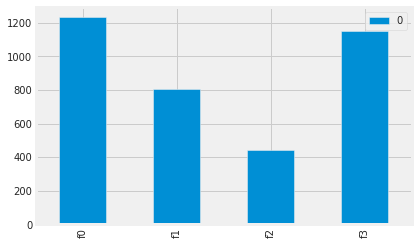

In [0]:
f_importance = model1.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

importance_df.plot.bar()

In [0]:
#From above model evalution metrics using different regression models for different companies data (i.e, Apple, Google), It is evident that the Multiple Linear Regression model is doing better with ~30% RMSE with the feature importances as high, low, and open while XGBoost regressor has high RMSE with the feature importances as high, low and volume. Hence our final model would be the Multiple Linear Regression.

In [0]:
from pyspark.sql.functions import lit

predictions_LR= predictions_LR.withColumn("Company_name", lit('Google'))
predictions = predictions.withColumn("Company_name", lit('Apple'))

result = predictions.union(predictions_LR)

result= result.select('Date','High', 'Low', 'Open', 'Volume','Company_name','prediction')

In [0]:
 #Create a view or table

stock_results = "result"

result.createOrReplaceTempView(stock_results)

# crime_df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

SELECT * FROM result

Date,High,Low,Open,Volume,Company_name,prediction
1980-12-22T00:00:00.000+0000,0.1328130066394806,0.1322540044784546,0.1322540044784546,3.73632E7,Apple,0.1325104504638944
1981-01-19T00:00:00.000+0000,0.14732100069522858,0.14676299691200256,0.14676299691200256,4.15744E7,Apple,0.14701436879967647
1981-01-20T00:00:00.000+0000,0.14285700023174286,0.14229899644851685,0.14285700023174286,3.00832E7,Apple,0.1421464840045241
1981-01-26T00:00:00.000+0000,0.1445309966802597,0.1439729928970337,0.1445309966802597,2.464E7,Apple,0.14381219134846793
1981-02-04T00:00:00.000+0000,0.1283479928970337,0.12779000401496887,0.12779000401496887,2.78656E7,Apple,0.12803601888369065
1981-02-20T00:00:00.000+0000,0.10881700366735458,0.10825899988412857,0.10881700366735458,2.43712E7,Apple,0.10812176669666392
1981-02-25T00:00:00.000+0000,0.1132809966802597,0.11272300034761429,0.11272300034761429,1.9488E7,Apple,0.11296808234229108
1981-03-20T00:00:00.000+0000,0.11607100069522858,0.11495500057935715,0.11495500057935715,1.46048E7,Apple,0.1156957334853769
1981-03-27T00:00:00.000+0000,0.11104899644851685,0.11049100011587143,0.11104899644851685,1.22528E7,Apple,0.11033631240819149
1981-04-27T00:00:00.000+0000,0.1289059966802597,0.1283479928970337,0.1289059966802597,3.8528E7,Apple,0.12821594569297937


In [0]:
%sql

SELECT Company_name, avg(prediction) as avg_closing_price from result group by Company_name


Company_name,avg_closing_price
Apple,16.784257070418
Google,37.64805192791964


In [0]:
# References

# https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook
